In [3]:
import json
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file="C:/Users/benja/Desktop/Improving_Mp_Search/meta_Beauty_and_Personal_Care.jsonl/meta_Beauty_and_Personal_Care.jsonl"

products = []

with open(file, 'r') as fp:
    for line in fp:
        products.append(json.loads(line.strip()))

In [4]:
original_length = len(products)
print(f"There are a total of {original_length} products.")

There are a total of 1028914 products.


In [5]:
# Subset all of the info to only include relevant fields
relevant_fields = ['title', 'rating_number', 'features', 'description']
products = [{field:product[field] for field in relevant_fields} for product in products]

# Combine features and description and remove unusual characters such as emojis.
for product in products:
    product['combined_description'] = re.sub(r'[^a-zA-Z0-9\s]', '', ' '.join(product['description'] + product['features'])).strip()

In [6]:
# Get the number of ratings for each product
num_ratings = []

for product in products:
    num_ratings.append(product['rating_number'])
    
num_ratings = np.array(num_ratings)

(0.0, 20000.0)

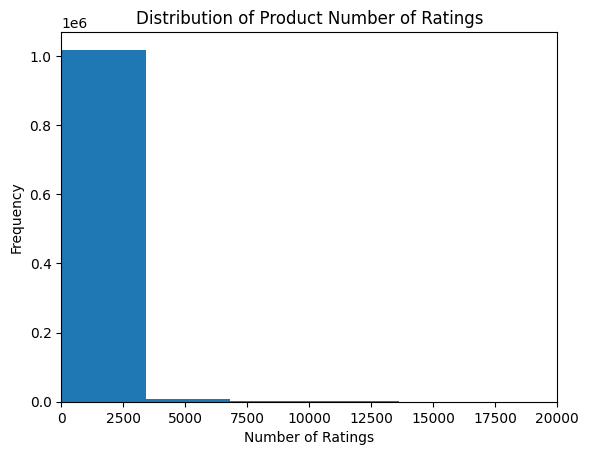

In [11]:
plt.hist(num_ratings, bins=100)
plt.title('Distribution of Product Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.xlim(0, 20000)

In [13]:
# Top 2000 products by number of ratings have at least this many
sorted(num_ratings)[-2000]

np.int64(12557)

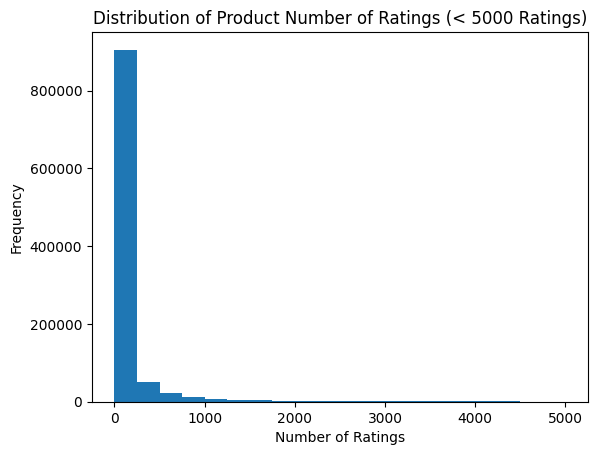

In [14]:
plt.hist(num_ratings[num_ratings < 5000], bins=20)
plt.title('Distribution of Product Number of Ratings (< 5000 Ratings)')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

In [15]:
ratings_threshold = 750
filtered_products = [product for product in products if product['rating_number'] > ratings_threshold]

print(f"There are now {len(filtered_products)} remaining products.")

There are now 51366 remaining products.


In [16]:
lengths = []
has_features = 0
has_description = 0

for product in filtered_products:
    lengths.append(len(product['combined_description']))
    if len(product['features']) > 0:
        has_features += 1
    
    if len(product['description']) > 0:
        has_description += 1
        
lengths = np.array(lengths)

In [17]:
print(f"Proportion of products with features: {round(has_features / len(filtered_products) * 100, 3)}%")
print(f"Proportion of products with descriptions: {round(has_description / len(filtered_products) * 100, 3)}%")

Proportion of products with features: 87.758%
Proportion of products with descriptions: 46.356%


(0.0, 5000.0)

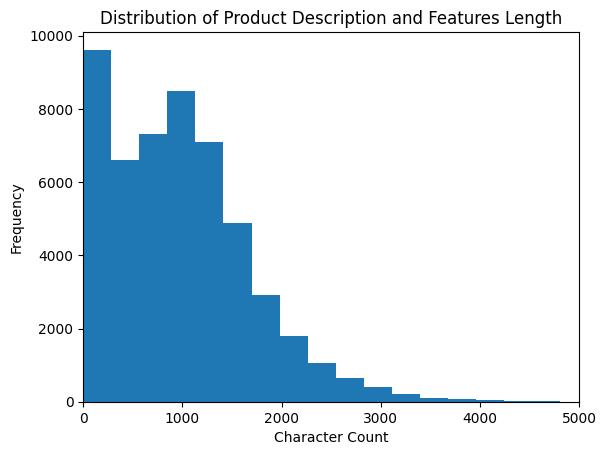

In [20]:
plt.hist(lengths, bins=100)
plt.title('Distribution of Product Description and Features Length')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.xlim(0, 5000)

In [21]:
description_threshold = 1000

final_products = [product for product in filtered_products if len(product['combined_description']) > description_threshold]

print(f"There are now {len(final_products)} remaining products.\nChange in products: {original_length} --> {len(final_products)}\nFiltered out {original_length-len(final_products)} products.")

There are now 23269 remaining products.
Change in products: 1028914 --> 23269
Filtered out 1005645 products.


In [22]:
for i in range(5):
    print(final_products[i])

{'title': 'Babo Botanicals Sheer Zinc Continuous Spray Sunscreen SPF 30 with 100% Mineral Active, Water-Resistant, Fragrance-Free, Vegan, for Babies, Kids or Sensitive Skin - 6 Oz. - 1-Pack', 'rating_number': 4526, 'features': ['100% GOOD FOR YOU & YOUR FAMILY: A fast-absorbing, ultra-sheer & lightweight sunblock for delicate skin. Water resistant and perfect for babies, kids and adults alike.', 'FORMULATED FOR VERY SENSITIVE SKIN: This sunscreen is specifically developed with zinc to provide you with 80 minutes of water and sweat resistant coverage. Safe for baby and perfect for the entire family. Fragrance free.', "ZINC-BASED, MINERAL FORMULA: Specially formulated to naturally protect your skin from UVA and UVB rays, this sunblock is oxybenzone and octinoxate free. Enriched with Babo's organic Nutri-Soothe Complex.", 'NO HARSH CHEMICALS OR IRRITANTS: Dermatologist tested to reduce risk of allergic reactions. Clinically tested and rated number #1 in safety by Environment Working Group

In [23]:
import pandas as pd

# Convert processed product data to DataFrame
df = pd.DataFrame(final_products)

# Save to CSV file
df.to_csv("C:/Users/benja/Desktop/Improving_Mp_Search/beauty_and_personal_care_filtered.csv")

print("CSV export complete: beauty_and_personal_care_filtered.csv")

CSV export complete: beauty_and_personal_care_filtered.csv
